QUESTION 1

In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)


In [2]:
data = sio.loadmat('FB_20141126.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
MO=np.array(LOB['MO'][0][0]*1.0)
dt = t[1]-t[0]

In [4]:
midprice = 0.5*(bid[:,0]+ask[:,0])
microprice= (bid[:,0]*askvol[:,0]+ask[:,0]*bidvol[:,0])/(bidvol[:,0]+askvol[:,0])
spread = ask[:,0]-bid[:,0]

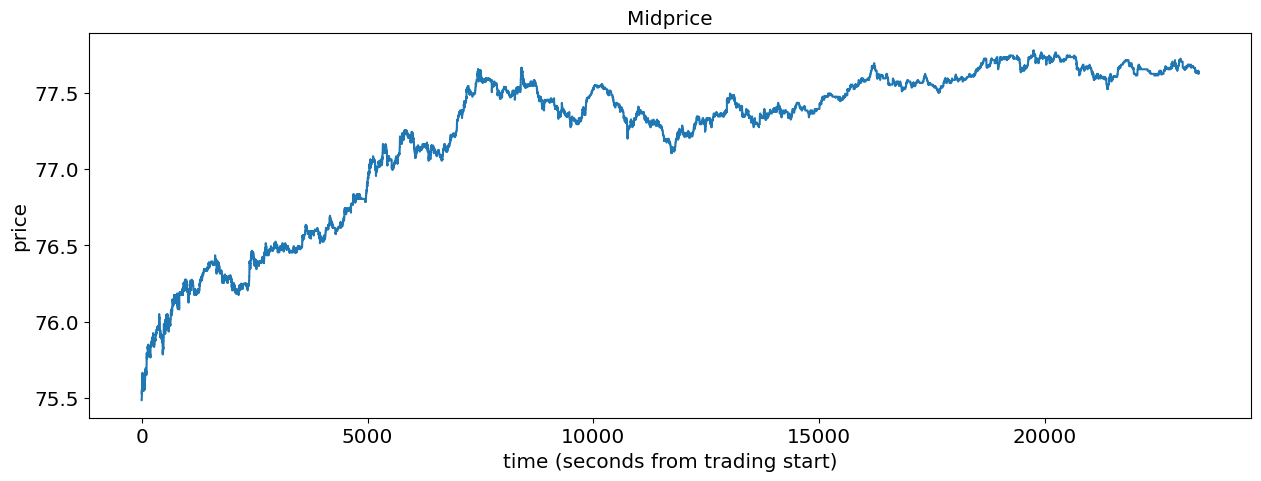

In [5]:
plt.plot(t, midprice)
plt.title('Midprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [6]:
type(midprice)


numpy.ndarray

In [7]:
import pandas as pd

In [8]:
midp = pd.DataFrame(midprice)

In [9]:
midp.describe()

,0
count,234000.000000
mean,77.237420
std,0.497852
min,75.485000
25%,77.105000
50%,77.405000
75%,77.595000
max,77.780000


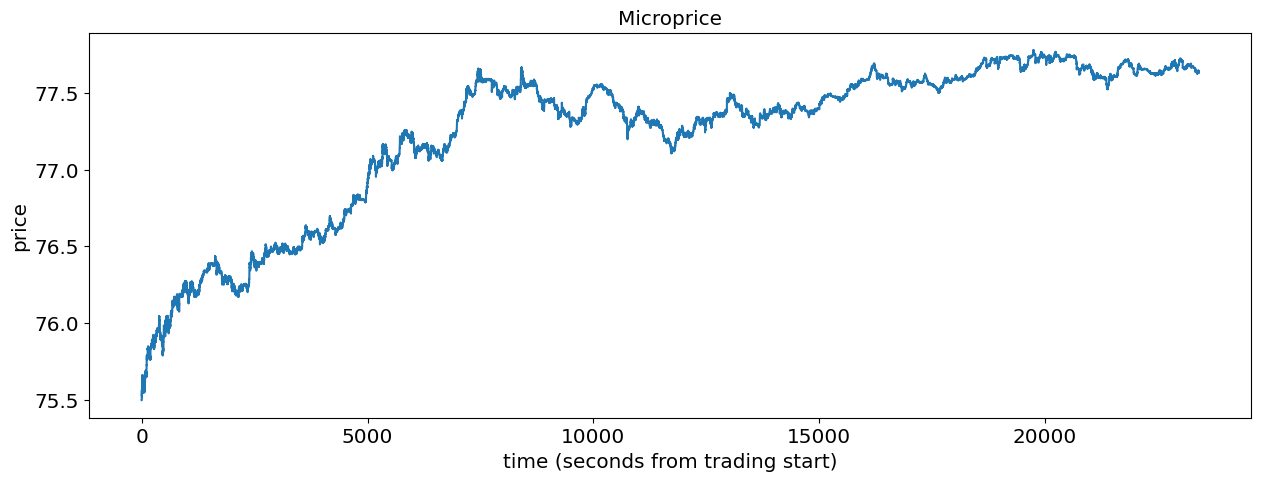

In [10]:
plt.plot(t, microprice)
plt.title('Microprice')
plt.ylabel('price')
plt.xlabel('time (seconds from trading start)')
plt.show()

In [11]:
microp = pd.DataFrame(microprice)

In [12]:
microp.describe()

,0
count,234000.000000
mean,77.237172
std,0.497735
min,75.498152
25%,77.108171
50%,77.403333
75%,77.590193
max,77.776842


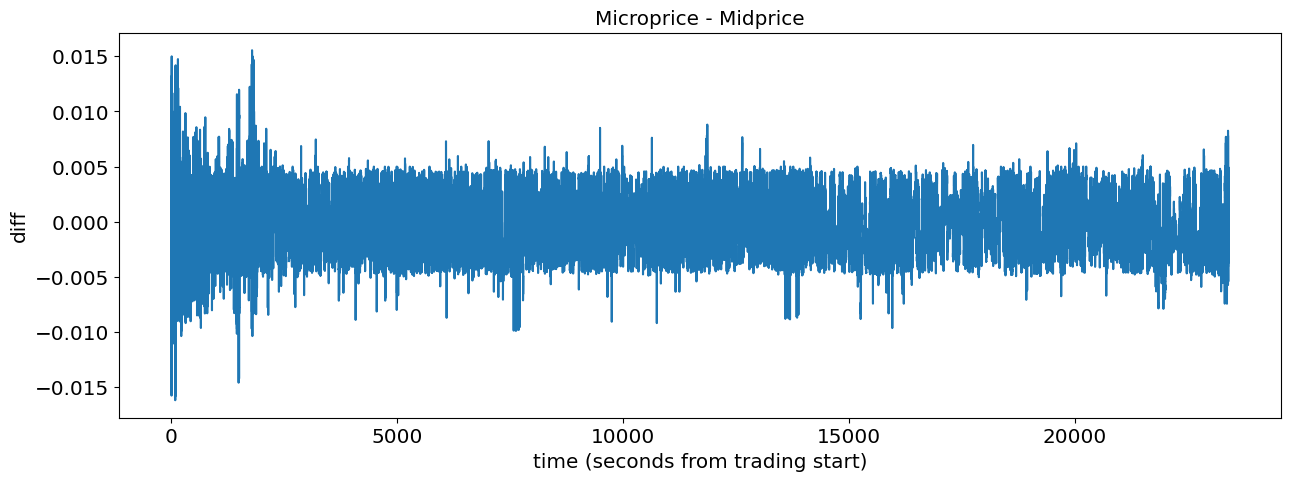

In [13]:
plt.plot(t, microprice-midprice)
plt.title('Microprice - Midprice')
plt.ylabel('diff')
plt.xlabel('time (seconds from trading start)')
plt.show()

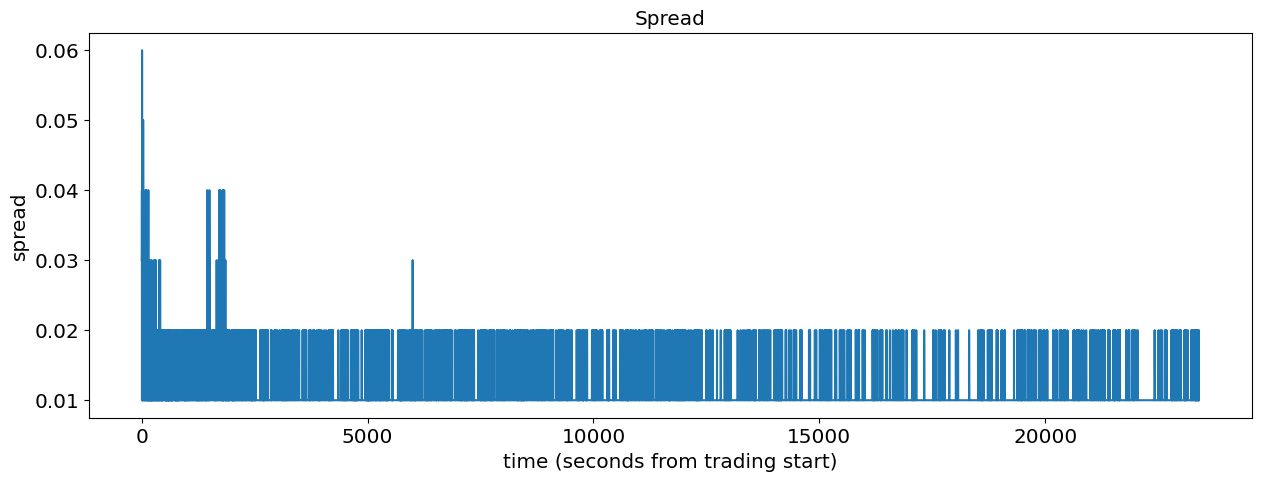

spread: 0.01


In [14]:
plt.plot(t,spread)
plt.title('Spread')
plt.ylabel('spread')
plt.xlabel('time (seconds from trading start)')
plt.show()
print(f"spread: {np.mean(spread):.2f}")

In [15]:
spread = pd.DataFrame(spread)

In [16]:
spread.describe()

,0
count,234000.000000
mean,0.010736
std,0.002859
min,0.010000
25%,0.010000
50%,0.010000
75%,0.010000
max,0.060000


In [17]:
rho = np.array((bidvol[:,0]-askvol[:,0])/(bidvol[:,0]+askvol[:,0]),ndmin=2).T

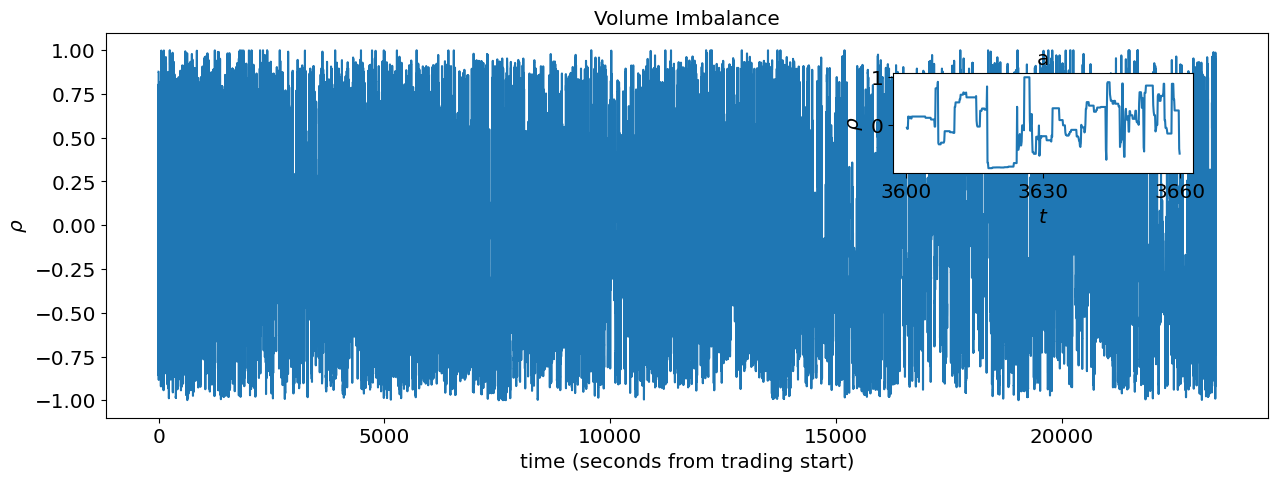

In [18]:
plt.plot(t, rho)
plt.title('Volume Imbalance')
plt.ylabel(r'$\rho$')
plt.xlabel('time (seconds from trading start)')

a = plt.axes([.65, .6, .2, .2])
idx = (t>3600) & (t<=3600+60)
plt.plot( t[idx], rho[idx])
plt.title('a')
plt.ylabel(r'$\rho$')
plt.xlabel(r'$t$')
plt.xticks([3600,3630,3660])

plt.show()


In [19]:
rho = pd.DataFrame(rho)

In [20]:
rho.describe()

,0
count,234000.000000
mean,-0.049366
std,0.489329
min,-0.999328
25%,-0.436778
50%,-0.062500
75%,0.331558
max,0.999498


QUESTION 2

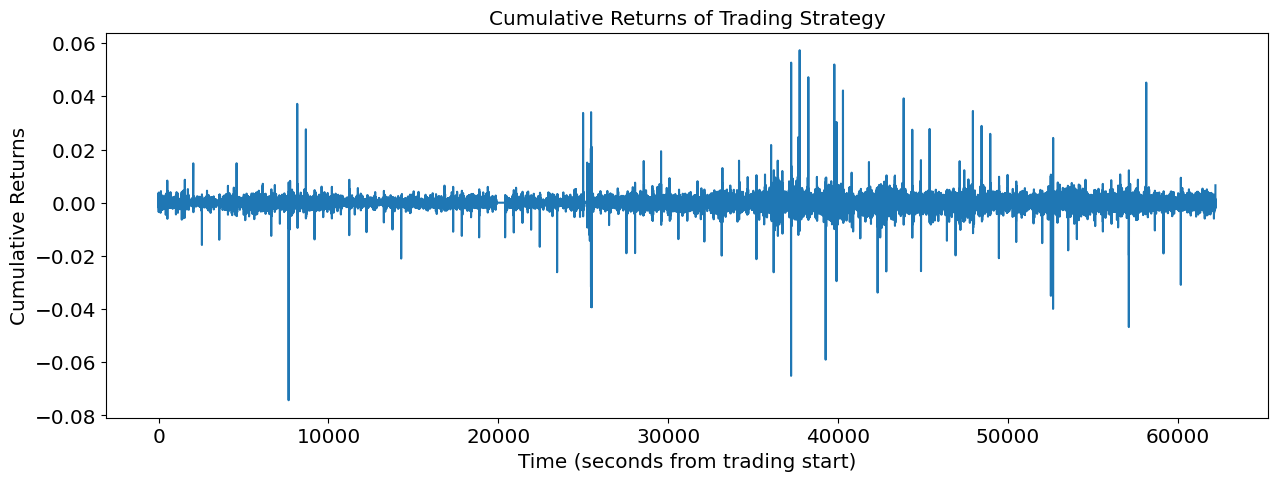

,Returns
count,6.221900e+04
mean,-9.544055e-07
std,1.825031e-03
min,-7.428571e-02
25%,-5.875441e-04
50%,0.000000e+00
75%,5.805515e-04
max,5.734521e-02


In [21]:
import scipy.io as sio  # for loading matlab data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # for plotting
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Load the data from the 'FTSE_sample.mat' file
data = sio.loadmat('FTSE_sample.mat')

# Extract the variables§
bid = np.array(data['Bestbid'])
ask = np.array(data['Bestask'])
MO=np.array(np.array(data['MO']))
# dt = t[1]-t[0]

# Extract the mid-price data
midprice = 0.5*(bid[:,0]+ask[:,0])

# Calculate the minutely returns
returns = np.diff(midprice) / midprice[:-1]

# Create a DataFrame with the returns
df_returns = pd.DataFrame({'Returns': returns})


plt.plot(returns)
plt.title('Cumulative Returns of Trading Strategy')
plt.xlabel('Time (seconds from trading start)')
plt.ylabel('Cumulative Returns')
plt.show()

# Display the DataFrame
df_returns.describe()




In [22]:
import statsmodels.api as sm
from matplotlib.collections import PolyCollection, LineCollection

# Calculate the net MO within each minute
net_MO = np.sum(MO, axis=1)

# # Calculate the autocorrelation function
acf = sm.tsa.acf(net_MO, nlags=20)

df_acf = pd.DataFrame({'ACF': acf})
df_acf.describe()

,ACF
count,21.000000
mean,0.082102
std,0.211941
min,0.015706
25%,0.021842
50%,0.033474
75%,0.040620
max,1.000000


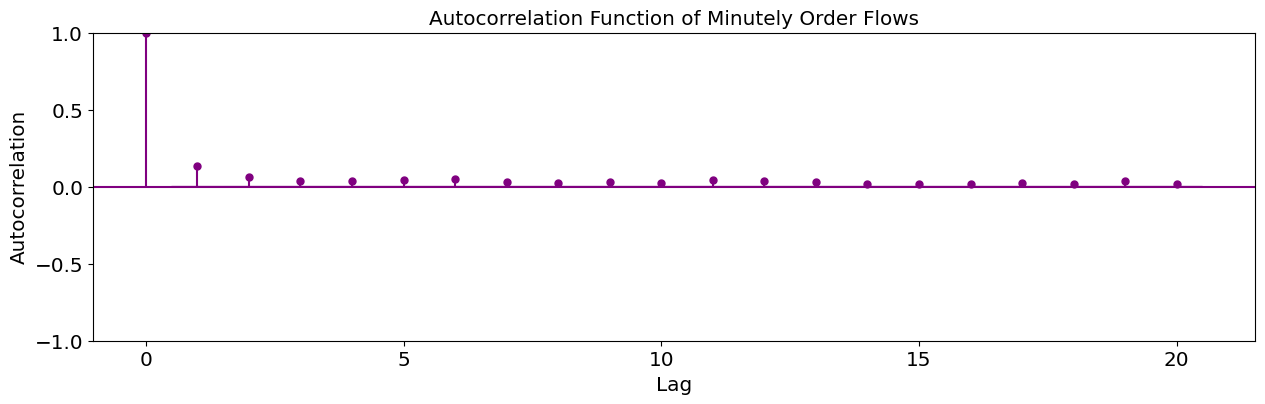

In [23]:
curr_fig, curr_ax = plt.subplots(figsize=(15, 4))

my_color="purple"
# Plot the autocorrelation function
sm.graphics.tsa.plot_acf(net_MO.squeeze(), lags=20, ax=curr_ax)
curr_ax.set_title('Autocorrelation Function of Minutely Order Flows')
curr_ax.set_xlabel('Lag')
curr_ax.set_ylabel('Autocorrelation')
#get polygon patch collections and change their color
for item in curr_ax.collections:
    #change the color of the CI 
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)
    #change the color of the vertical lines
    if type(item)==LineCollection:
        item.set_color(my_color)    

#change the color of the markers/horizontal line
for item in curr_ax.lines:
    item.set_color(my_color)

plt.show()

# Analyze the result
# You can analyze the result by examining the magnitude and significance of the autocorrelation values.
# Positive autocorrelation at lag k indicates positive dependence between order flows k minutes apart.
# Negative autocorrelation at lag k indicates negative dependence between order flows k minutes apart.
# Autocorrelation values close to 0 indicate no significant dependence between order flows.

In [24]:
import numpy as np
import statsmodels.formula.api as smf

a=[bid,ask]
array_2d = np.squeeze(a, axis=2)
columns=['Bestbid','Bestask']
data=pd.DataFrame(np.transpose(array_2d),columns=columns)
data['mid']=(data['Bestbid']+data['Bestask'])/2
data['returns']=np.log(data['mid'] / data['mid'].shift(1)) 
data['order_flow']=np.sum(MO, axis=1)
data['lagged_returns']= data['returns'].shift(1) 
model = smf.ols(formula='returns ~lagged_returns + order_flow', data=data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     4361.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:30:05   Log-Likelihood:             3.0804e+05
No. Observations:               62218   AIC:                        -6.161e+05
Df Residuals:                   62215   BIC:                        -6.161e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.003e-06   6.86e-06      0.146      0.884   -1.25e-05    1.45e-05
lagged_returns    -0.0379      0.004    -10.088      0.000      -0.045      -0.031
order_flow      2.429e-05   2.61e-07     93.129      0.000    2.38e-05    2.48e-05
==============================================================================
Omnibus:                    44198.801   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        144438701.075
Skew:                          -1.791   Prob(JB):                         0.00
Kurtosis:                     239.015   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
data['cumulative_returns']=data['returns'].rolling(30).sum()
data['position']=-np.sign(data['cumulative_returns'])
data.dropna(inplace=True)
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].sum()

returns    -0.182322
strategy    2.231237
dtype: float64

<Axes: title={'center': 'Returns'}, xlabel='Time', ylabel='Returns'>

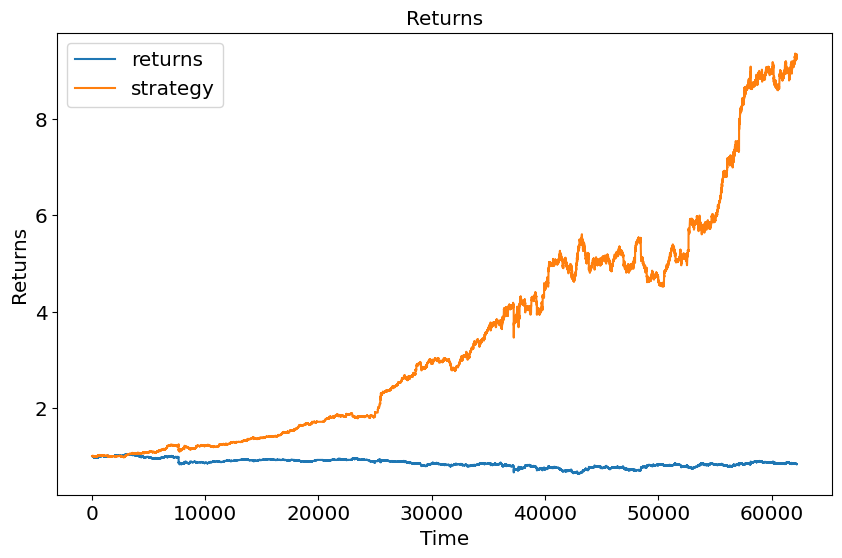

In [26]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6), title='Returns',xlabel='Time',ylabel='Returns')

Question 3

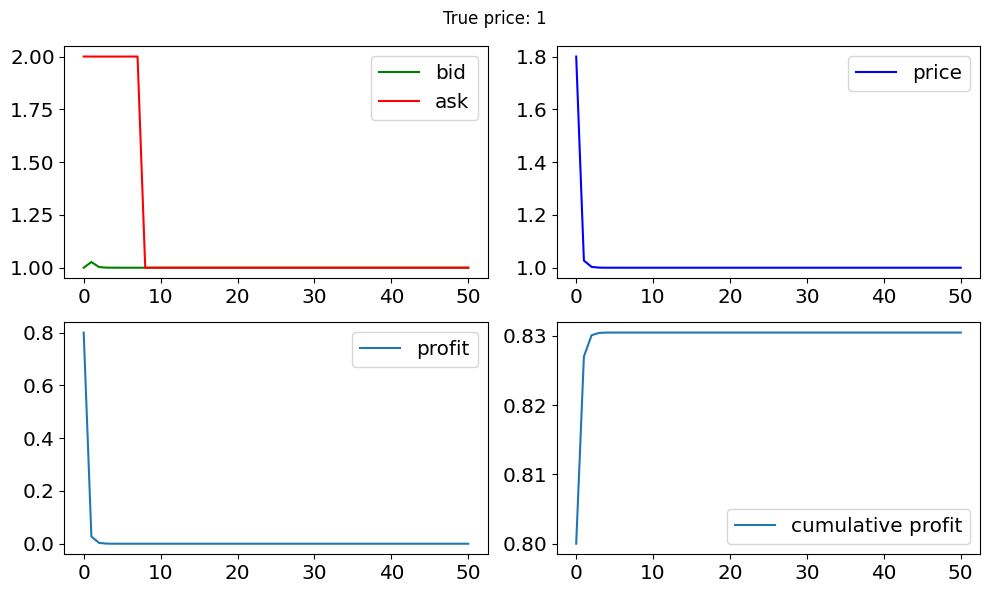

In [27]:
import numpy as np
import matplotlib.pyplot as plt


class Glosten_Milgrom():

    V_LOW = 1
    V_HIGH = 2
    MU = 0.8
    DELTA = 0.8
    GAMMA = 0.5
    T_MAX = 50

    def __init__(self):
        self.init_value = None
        self.ask = [self.V_HIGH]
        self.bid = [self.V_LOW]
        self.prices = [self.V_LOW * (1 - self.DELTA) + self.V_HIGH * self.DELTA]

        self.gm_model()

    def gm_model(self):
        # initialise real value and sequence of traders
        self.init_value = np.random.choice([self.V_LOW, self.V_HIGH], p=[self.DELTA, 1 - self.DELTA])
        traders = np.random.choice(['I', 'U'], p=[self.MU, 1 - self.MU], size=self.T_MAX)

        for trader in traders:
            # define action is a BUY or SELL order
            if trader == 'I':
                if self.init_value == self.V_HIGH:
                    action = 'B'
                else:
                    action = 'S'
            elif trader == 'U':
                action = np.random.choice(['B', 'S'], p=[self.GAMMA, 1 - self.GAMMA])

            # market makers make price
            bidask, price, self.DELTA = self.make_price(buy_action=(action=='B'))
            if bidask == 'bid':
                self.bid.append(price)
                self.ask.append(self.ask[-1])
            else:
                self.ask.append(price)
                self.bid.append(self.bid[-1])
            self.prices.append(price)

    def make_price(self, buy_action=True):
        # calculate conditional probability
        prob_buy = (1 - self.DELTA) * self.MU + (1 - self.DELTA) * (1 - self.MU) * self.GAMMA + self.DELTA * (1 - self.MU) * self.GAMMA
        prob_sell = 1 - prob_buy
        prob_low_buy = self.DELTA * (1 - self.MU) * self.GAMMA
        prob_low_sell = self.DELTA * self.MU + self.DELTA * (1 - self.MU) * (1 - self.GAMMA)
        prob_high_buy = (1 - self.DELTA) * self.MU + (1 - self.DELTA) * (1 - self.MU) * self.GAMMA
        prob_high_sell = (1 - self.DELTA) * (1 - self.MU) * (1 - self.GAMMA)

        # update market maker's belief
        if buy_action:
            price = (self.V_LOW * prob_low_buy / prob_buy) + (self.V_HIGH * prob_high_buy / prob_buy)
            return 'ask', price, (prob_low_buy / prob_buy)
        else:
            price = (self.V_LOW * prob_low_sell / prob_sell) + (self.V_HIGH * prob_high_sell / prob_sell)
            return 'bid', price, (prob_low_sell / prob_sell)

    def plot_result(self):
        fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,6))
        axes = axes.ravel()

        axes[0].plot(self.bid, 'g', label='bid')
        axes[0].plot(self.ask, 'r', label='ask')
        axes[0].legend()

        axes[1].plot(self.prices, 'b', label='price')
        axes[1].legend()

        axes[2].plot(np.array(self.prices) - self.init_value, label='profit')
        axes[2].legend()

        axes[3].plot(np.cumsum(np.array(self.prices) - self.init_value), label='cumulative profit')
        axes[3].legend()
        fig.suptitle(f'True price: {self.init_value}')
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    gm = Glosten_Milgrom()
    gm.plot_result()